In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import scipy
from tqdm import tqdm
import h5py

import calculation.MeanFieldv2 as MFv2
import calculation.CurrentMeirv2 as CsMv2
import calculation.SusceptibilitySimpv2 as Susceptv2
import settings.Constants as const

In [2]:
saddleFile = "h5_output_data/VT-space.hdf5"
shotFile = "h5_output_data/CurrentNoiseVT_results.hdf5"
    
##! Read data from the hdf5 file
with h5py.File(saddleFile, 'r') as f:
    domain = f['VTSpace/domain'][:]
    DRDataOne = f['VTSpace/DRDataOne'][:]
    DKDataOne = f['VTSpace/DKDataOne'][:]


with h5py.File(shotFile, 'r') as f:
    retardedNonIntZero = f['ShotNoise/retardedNonIntZero'][:]
    keldyshNonIntZero = f['ShotNoise/keldyshNonIntZero'][:]
    
    retardedNonIntOne = f['ShotNoise/retardedNonIntOne'][:]
    keldyshNonIntOne = f['ShotNoise/keldyshNonIntOne'][:]
    retardedIntOne = f['ShotNoise/retardedIntOne'][:]
    keldyshIntOne = f['ShotNoise/keldyshIntOne'][:]
    
    domainOne = f['ShotNoise/domainOne'][:]
    dominZero = f['ShotNoise/domainZero'][:]


voltageSpace = domain[:,1]
TvalueSpace = domain[:,-1]

In [3]:
print(min(voltageSpace))
print(min(TvalueSpace))

0.0001
0.0001


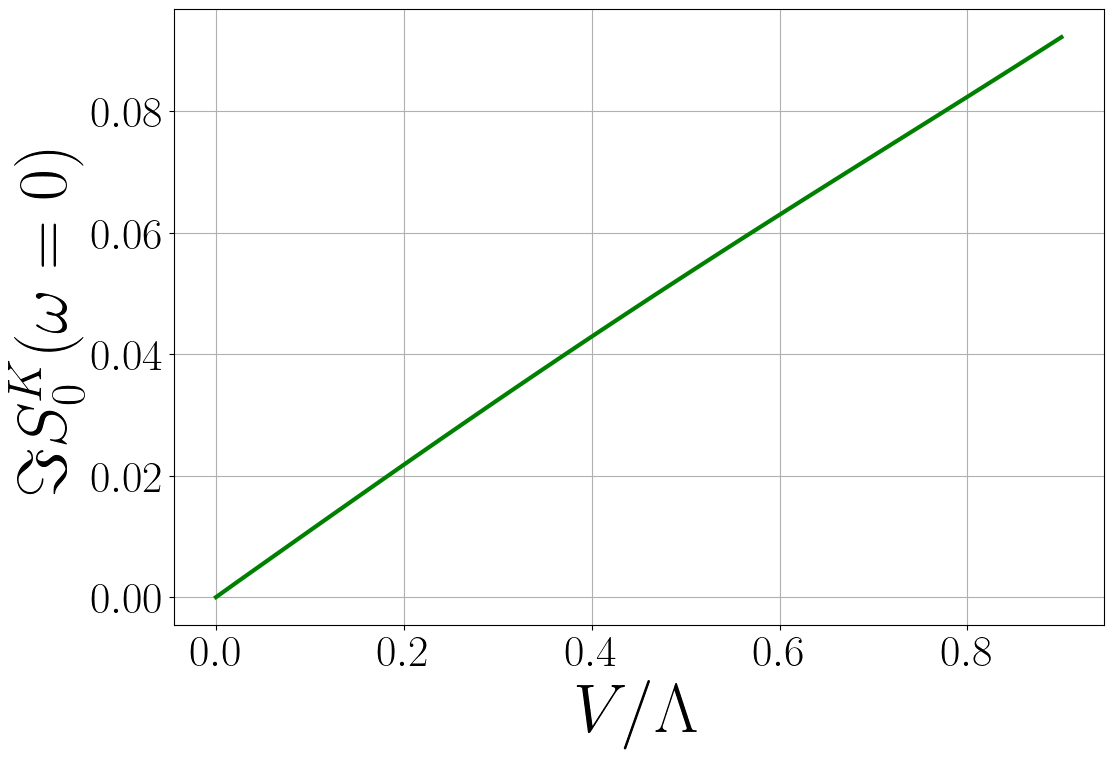

In [6]:


maskCheck = TvalueSpace < 1e-3

x_mod = voltageSpace[maskCheck]
y_mod = TvalueSpace[maskCheck]
z_mod = keldyshNonIntZero[maskCheck, 1].real


fig, ax = plt.subplots(figsize=(12, 8))
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.plot(x_mod/2, z_mod/100, linewidth=3, color="green")
ax.tick_params(axis='x', labelsize=32)
ax.tick_params(axis='y', labelsize=32)
plt.xlabel(r'$V/\Lambda$', fontsize=50)
plt.ylabel(r'$\Im S_{0}^K(\omega=0)$', fontsize=50)
plt.grid()
plt.savefig("panelsCurrentNoise/ImSK_NonInt_Zero_V.png", bbox_inches='tight', dpi=600)
# plt.yscale('log')

In [7]:

# Fit a 1st-degree polynomial (line): y = m x + b
m, b = np.polyfit(x_mod/2, z_mod/100, deg=1)
print(f"Slope: {m:.3f}, Intercept: {b:.3f}")


Slope: 0.102, Intercept: 0.001


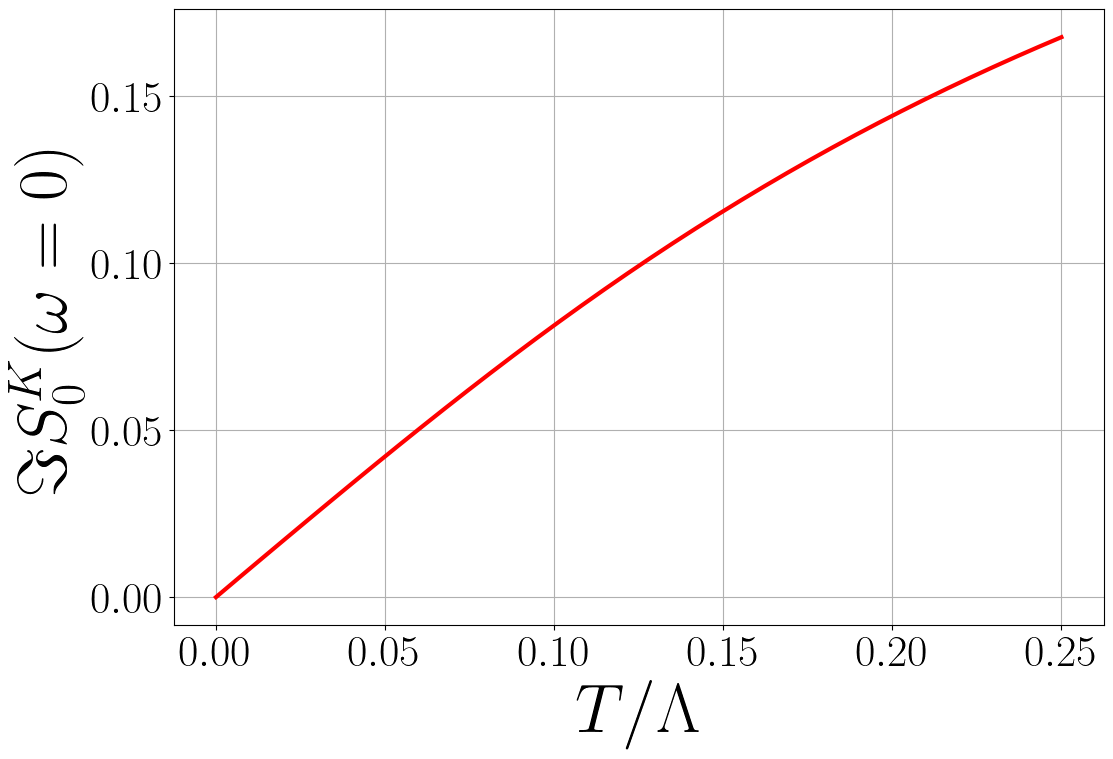

In [9]:
maskCheck = voltageSpace < 1e-3

x_mod = voltageSpace[maskCheck]
y_mod = TvalueSpace[maskCheck]
z_mod = keldyshNonIntZero[maskCheck, 1].real


fig, ax = plt.subplots(figsize=(12, 8))
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.plot(y_mod/2, z_mod/100, linewidth=3, color="red")
ax.tick_params(axis='x', labelsize=32)
ax.tick_params(axis='y', labelsize=32)
# plt.xlim(0.0, 0.15)
# plt.ylim(0.0, 0.15)
plt.xlabel(r'$T/\Lambda$', fontsize=50)
plt.ylabel(r'$\Im S_{0}^K(\omega=0)$', fontsize=50)
plt.grid()
plt.savefig("panelsCurrentNoise/ImSK_NonInt_Zero_T.png", bbox_inches='tight', dpi=600)

In [10]:
m, b = np.polyfit(y_mod/2, z_mod/100, deg=1)
print(f"Slope: {m:.3f}, Intercept: {b:.3f}")


Slope: 0.676, Intercept: 0.009
